

# Charger de nouveau les data


In [4]:
!pip install scikeras

In [5]:

import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape, Activation, Dropout, Add, SimpleRNN
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import os
import numpy as np
import argparse
import pandas as pd
import seaborn as sns
import random as rd
# Plot model
from tensorflow.keras.utils import plot_model
# Optimizers
from tensorflow.keras.optimizers import SGD, Adam

# Useful Sklearn library
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import sklearn.metrics


from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [6]:
from google.colab import drive
drive.mount("/content/drive")
%cd  /content/drive/MyDrive/Biomarketers
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Biomarketers


'/content/drive/MyDrive/Biomarketers'

In [7]:
# Train Data
x_train1 = pd.read_csv("X_train_final_30.csv", index_col=[0])
print("Xtrain1 : ", x_train1.shape)
y_train1 = pd.read_csv("y_train_30.csv", index_col=[0])
print("Ytrain1 : ", y_train1.shape)


Xtrain1 :  (2625, 1533)
Ytrain1 :  (2625, 1)
Xtrain2 :  (2813, 509)
Ytrain2 :  (2813, 1)


In [9]:
# Test Data
x_test1 = pd.read_csv("X_test_final_30.csv", index_col=[0])
print(x_test1.shape)
y_test1 = pd.read_csv("y_test_30.csv", index_col=[0])
print(y_test1.shape)


(1126, 1533)
(1126, 1)
(938, 509)
(938, 1)


# MLP ADAM vs SGD JD2

## jeu de données 1


In [30]:
#ADAM

def mlp_adam1():
  model = Sequential()
  model.add(Dense(1024, input_shape=(x_train1.shape[1],), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(960, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))

  return model


Epoch 1/50
66/66 [==============================] - 3s 7ms/step - loss: 0.7621 - accuracy: 0.4800 - val_loss: 0.7138 - val_accuracy: 0.4648 - lr: 1.0000e-07
Epoch 2/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7254 - accuracy: 0.5414 - val_loss: 0.6655 - val_accuracy: 0.5962 - lr: 0.0020
Epoch 3/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6057 - val_loss: 0.5907 - val_accuracy: 0.7238 - lr: 0.0040
Epoch 4/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6495 - accuracy: 0.6538 - val_loss: 0.5846 - val_accuracy: 0.6876 - lr: 0.0060
Epoch 5/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6442 - accuracy: 0.6814 - val_loss: 0.5912 - val_accuracy: 0.6933 - lr: 0.0080
Epoch 6/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7022 - accuracy: 0.6014 - val_loss: 0.6223 - val_accuracy: 0.5352 - lr: 0.0100
Epoch 7/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7349

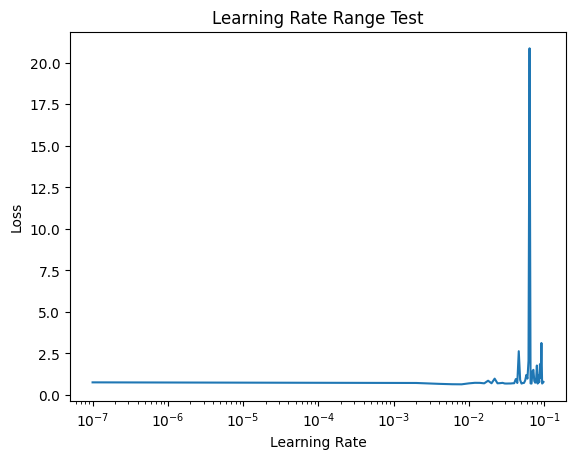

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from keras.optimizers import Adam

def lr_schedule(epoch):
    start_lr = 1e-7
    end_lr = 1e-1
    return start_lr + epoch * (end_lr - start_lr) / epochs

# Create a simple neural network model
model = mlp_adam1()

# Compile the model with an initial learning rate (you can adjust this)
initial_lr = 1e-5
model.compile(optimizer=Adam(learning_rate=initial_lr), loss='binary_crossentropy', metrics=['accuracy'])

# Perform the learning rate range test
epochs = 50  # Number of total epochs

# Define Learning Rate Scheduler callback with custom schedule function
lr_callback = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(x_train1, y_train1, epochs=epochs, batch_size=32, validation_split=0.2, callbacks=[lr_callback])

# Visualize the learning rate vs. loss
lrs = [lr_schedule(epoch) for epoch in range(epochs)]
losses = history.history['loss']
plt.semilogx(lrs, losses)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Range Test')
plt.show()

In [32]:
tf.random.set_seed(123)
model_adam1 = mlp_adam1()
model_adam1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.007), metrics=['accuracy'])  # Utilisez Adam
#model_adam1.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto', restore_best_weights=True)  # Stop training after 5 epochs of no improvement in validation loss
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',  # Metric to be monitored
#                               factor=0.5,          # Factor by which the learning rate will be reduced (new_lr = lr * factor)
#                               patience=10,          # Number of epochs with no improvement after which learning rate will be reduced
#                               min_lr=1e-7,         # Lower bound on the learning rate
#                               verbose=1)

model_train_a1 =  model_adam1.fit(x_train1,y_train1, epochs=20,validation_data=(x_test1, y_test1),batch_size=60)#, callbacks=[early_stopping])


Epoch 1/20
44/44 [==============================] - 3s 10ms/step - loss: 1.0230 - accuracy: 0.5688 - val_loss: 0.6216 - val_accuracy: 0.6892
Epoch 2/20
44/44 [==============================] - 0s 6ms/step - loss: 0.6307 - accuracy: 0.6747 - val_loss: 0.6375 - val_accuracy: 0.6590
Epoch 3/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5923 - accuracy: 0.7078 - val_loss: 0.5565 - val_accuracy: 0.7549
Epoch 4/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5566 - accuracy: 0.7291 - val_loss: 0.5184 - val_accuracy: 0.7620
Epoch 5/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5440 - accuracy: 0.7482 - val_loss: 0.5186 - val_accuracy: 0.7682
Epoch 6/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5548 - accuracy: 0.7356 - val_loss: 0.5122 - val_accuracy: 0.7558
Epoch 7/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5494 - accuracy: 0.7497 - val_loss: 0.5453 - val_accuracy: 0.7496
Epoch 8/20
44/44 [=

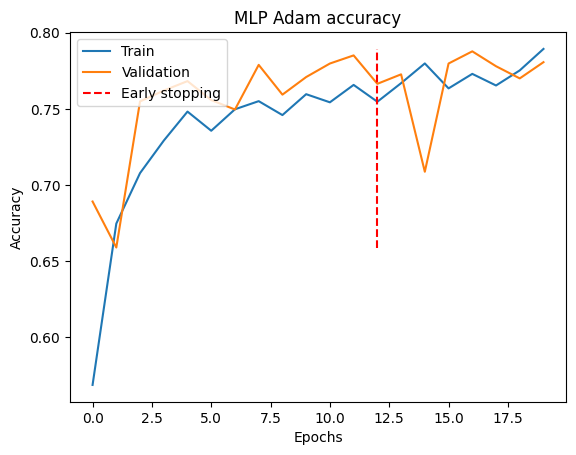

In [34]:
# Curves Accuracy
plt.plot(model_train_a1.history['accuracy'])
plt.plot(model_train_a1.history['val_accuracy'])
plt.vlines(x=12,ymin=min(model_train_a1.history['val_accuracy']), ymax=max(model_train_a1.history['accuracy']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('MLP Adam accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_adam_acc_78_final.png',  dpi=500)
plt.show()

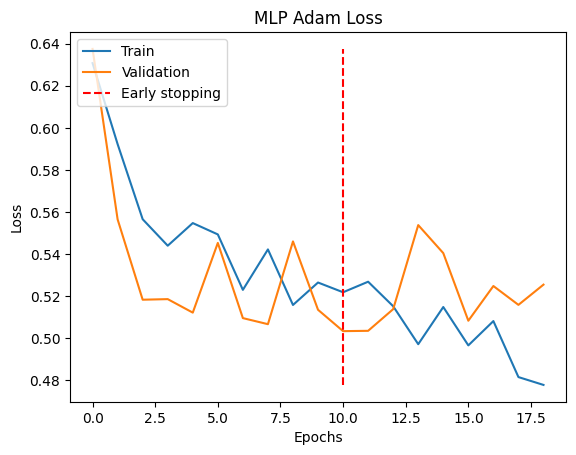

In [35]:
# Curves loss
plt.plot(model_train_a1.history['loss'][1:])
plt.plot(model_train_a1.history['val_loss'][1:])
plt.vlines(x=10, ymin=min(model_train_a1.history['loss']), ymax=max(model_train_a1.history['val_loss']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('MLP Adam Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_adam_78_loss_final.png',  dpi=500)
plt.show()

In [36]:
evaluation = model_adam1.evaluate(x_test1,y_test1)

print("Accuracy: %.2f" % (evaluation[1] * 100))
print('Loss: %2f' % (evaluation[0]))

predictions = model_adam1.predict(x_test1)

maxi = [np.argmax(x) for x in predictions]
print("10 first Prediction, Rounded raw predictions and true class")
for i in range(10):
  print(f'{predictions[i]} | {maxi[i]} | True:  {y_test1.iloc[i]} ')

36/36 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7806
Accuracy: 78.06
Loss: 0.525528
36/36 [==============================] - 0s 2ms/step
10 first Prediction, Rounded raw predictions and true class
[0.92522407] | 0 | True:  Activity    1
Name: 2767, dtype: int64 
[0.6450291] | 0 | True:  Activity    0
Name: 2745, dtype: int64 
[0.97186565] | 0 | True:  Activity    1
Name: 660, dtype: int64 
[0.6254086] | 0 | True:  Activity    1
Name: 2165, dtype: int64 
[0.13619368] | 0 | True:  Activity    1
Name: 2340, dtype: int64 
[0.5180481] | 0 | True:  Activity    0
Name: 2914, dtype: int64 
[0.21403566] | 0 | True:  Activity    0
Name: 1818, dtype: int64 
[0.82677686] | 0 | True:  Activity    1
Name: 38, dtype: int64 
[0.5116205] | 0 | True:  Activity    1
Name: 1532, dtype: int64 
[0.9032346] | 0 | True:  Activity    1
Name: 2477, dtype: int64 


36/36 [==============================] - 0s 2ms/step
[[350 159]
 [ 91 526]]
Accuracy:0.78


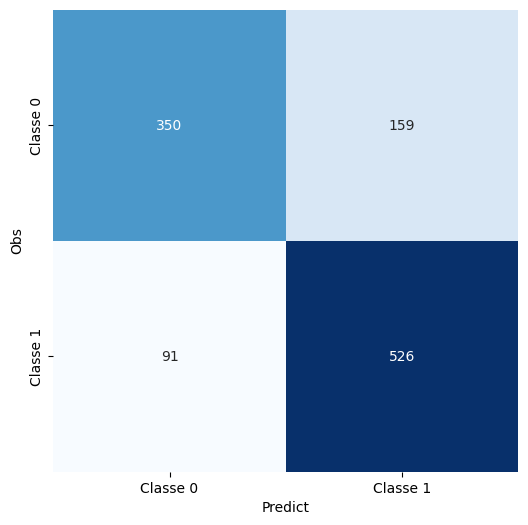

In [58]:

X_test = pd.read_csv("X_test_30.csv", index_col=0)
y_test = pd.read_csv("y_test_30.csv")
indices_test = y_test["Unnamed: 0"]
y_test = pd.read_csv("y_test_30.csv", index_col=0)
y_pred_test_proba = model_adam1.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()
predictions = [1 if p>=0.5 else 0 for p in y_pred_test_proba]
# SAVE LES 0/1 PREDITS
y_pred_to_save = pd.DataFrame( predictions, indices_test)
y_pred_to_save.to_csv("YPred_models/y_pred_adam_78_finalhhh.csv")
# SAVE LES PROBAS PREDITS
y_pred_prob_to_save = pd.DataFrame( y_pred_test_proba, indices_test)
y_pred_prob_to_save.to_csv("YPred_models/y_pred_prob_adam_78_finaljhjj.csv")

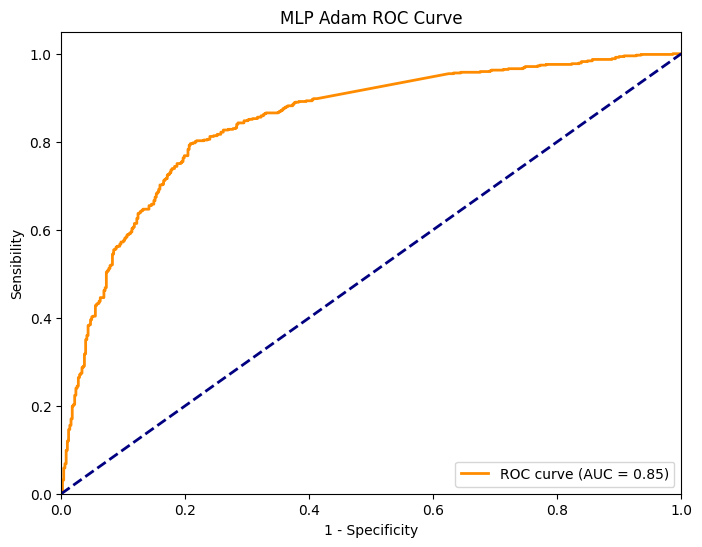

In [59]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('MLP Adam ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/adam_78_ROC_finalhjhhh.png',  dpi=500)
plt.show()

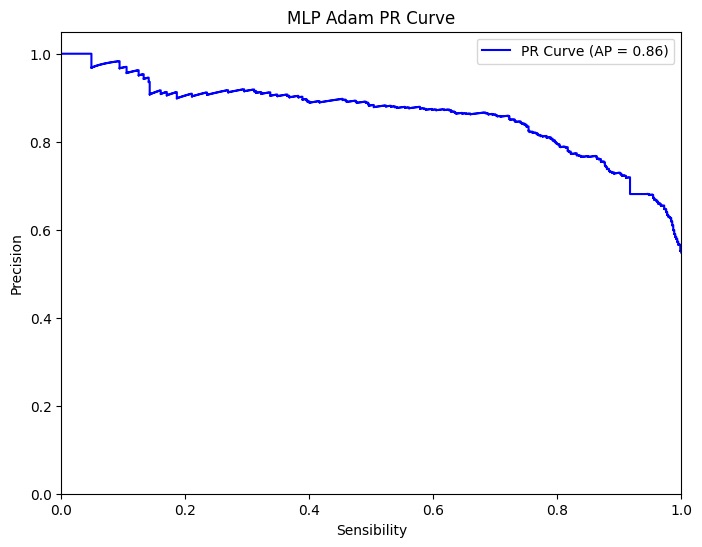

In [ ]:
# PR curve :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_test_proba)

average_precision = average_precision_score(y_test, y_pred_test_proba)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('MLP Adam PR Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_classes)
print("F1-Score:", f1)

F1-Score: 0.8122137404580152


In [ ]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_classes)
print("MCC:", mcc)

MCC: 0.5585061810246573


In [ ]:
# Sensibilité :
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_test_classes)

print("Sensibilité", sensitivity)

Sensibilité 0.8622366288492707


In [ ]:
# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

Specificity: 0.6836935166994106


In [ ]:
# Log loss
import math
def compute_log_loss_for_one_sample(y_obs, y_pred):
  return -(y_obs * math.log(y_pred) + (1-y_obs)*math.log(1-y_pred))

def compute_log_loss(y_obs, y_pred):
  """
  Computing the log loss metric.
  y_obs = the data we have, the "real" data (vector)
  """
  log_loss = -np.mean(y_obs * np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))
  return log_loss

In [ ]:

log_losses = []
# Getting the log loss for each sample in test data set
for i in range(len(y_pred_test_proba)):
  log_losses.append(compute_log_loss_for_one_sample(y_test[i], y_pred_test_proba[i]))

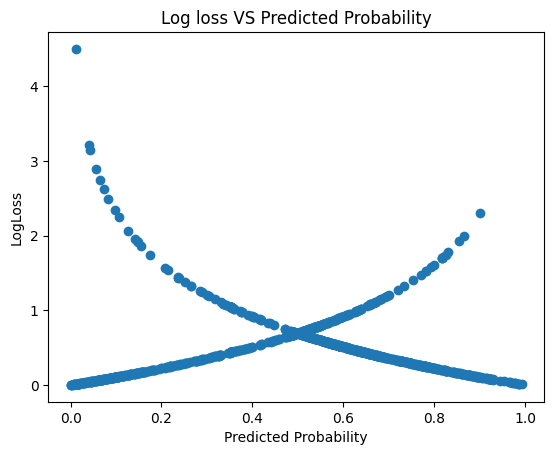

In [ ]:
#Plotting log loss and predicted probability
plt.scatter(y=log_losses, x = y_pred_test_proba)
plt.title('Log loss VS Predicted Probability')
plt.ylabel('LogLoss')
plt.xlabel('Predicted Probability')
plt.show()

In [60]:
# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler
X_test_Kaggle = pd.read_csv("test.csv")
print(X_test_Kaggle.shape)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
print(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[x_train1.columns]
y_pred_test_proba = model_adam1.predict(X_scaled)
print(y_pred_test_proba.shape)

# Créez un dictionnaire avec les données
y_pred_test_proba = y_pred_test_proba[:, 0]
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_Adam.csv', index=False)

(2501, 1776)
[[0.37931035 0.61176451 0.05       ... 0.         1.         0.        ]
 [0.10344828 0.75817463 0.3        ... 0.         0.         0.        ]
 [0.10344828 0.65881212 0.1        ... 0.         0.         0.        ]
 ...
 [0.         0.53788699 0.15       ... 0.         0.         0.        ]
 [0.03444828 0.53850418 0.1        ... 0.         0.         0.        ]
 [0.17241379 0.64893183 0.05       ... 0.         0.         0.        ]]
79/79 [==============================] - 0s 2ms/step
(2501, 1)


## SGD MLP


### jeu de données 1

In [38]:
from keras.optimizers import SGD

# SGD
def mlp_SGD1():
  model = Sequential()
  model.add(Dense(1024, input_shape=(x_train1.shape[1],), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(960, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  return model




Epoch 1/50
66/66 [==============================] - 2s 7ms/step - loss: 0.7274 - accuracy: 0.4829 - val_loss: 0.6991 - val_accuracy: 0.4781 - lr: 1.0000e-07
Epoch 2/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7283 - accuracy: 0.5395 - val_loss: 0.6138 - val_accuracy: 0.6895 - lr: 0.0020
Epoch 3/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.6548 - val_loss: 0.6693 - val_accuracy: 0.7371 - lr: 0.0040
Epoch 4/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.6748 - val_loss: 0.5425 - val_accuracy: 0.7429 - lr: 0.0060
Epoch 5/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6409 - accuracy: 0.6781 - val_loss: 0.5280 - val_accuracy: 0.7581 - lr: 0.0080
Epoch 6/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7155 - accuracy: 0.6024 - val_loss: 0.6363 - val_accuracy: 0.6610 - lr: 0.0100
Epoch 7/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7688

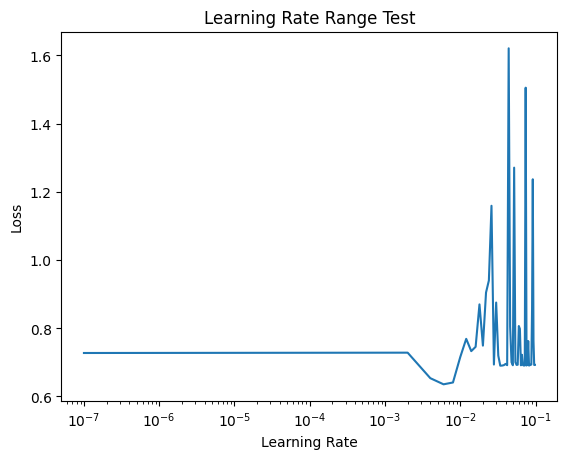

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from keras.optimizers import Adam

def lr_schedule(epoch):
    start_lr = 1e-7
    end_lr = 1e-1
    return start_lr + epoch * (end_lr - start_lr) / epochs

# Create a simple neural network model
model = mlp_adam1()

# Compile the model with an initial learning rate (you can adjust this)
initial_lr = 1e-5
model.compile(optimizer=Adam(learning_rate=initial_lr), loss='binary_crossentropy', metrics=['accuracy'])

# Perform the learning rate range test
epochs = 50  # Number of total epochs

# Define Learning Rate Scheduler callback with custom schedule function
lr_callback = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(x_train1, y_train1, epochs=epochs, batch_size=32, validation_split=0.2, callbacks=[lr_callback])

# Visualize the learning rate vs. loss
lrs = [lr_schedule(epoch) for epoch in range(epochs)]
losses = history.history['loss']
plt.semilogx(lrs, losses)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Range Test')
plt.show()

In [39]:
tf.random.set_seed(123)
sgd = SGD(learning_rate=0.007, momentum=0.9)

# modele SGD
model_sgd1 = mlp_SGD1()
model_sgd1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model_sgd1.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=1,
                              verbose=0, mode='auto', restore_best_weights=True)  # Stop training after 5 epochs of no improvement in validation loss
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',  # Metric to be monitored
#                               factor=0.5,          # Factor by which the learning rate will be reduced (new_lr = lr * factor)
#                               patience=10,          # Number of epochs with no improvement after which learning rate will be reduced
#                               min_lr=1e-7,         # Lower bound on the learning rate
#                               verbose=1)

model_train_s1 =  model_sgd1.fit(x_train1,y_train1, epochs=20,validation_data=(x_test1, y_test1),batch_size=60)#, callbacks=[early_stopping])


Epoch 1/20
44/44 [==============================] - 2s 10ms/step - loss: 0.7043 - accuracy: 0.5211 - val_loss: 0.6772 - val_accuracy: 0.5844
Epoch 2/20
44/44 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.5516 - val_loss: 0.6625 - val_accuracy: 0.6146
Epoch 3/20
44/44 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.5989 - val_loss: 0.6356 - val_accuracy: 0.6288
Epoch 4/20
44/44 [==============================] - 0s 5ms/step - loss: 0.6416 - accuracy: 0.6389 - val_loss: 0.6020 - val_accuracy: 0.6821
Epoch 5/20
44/44 [==============================] - 0s 6ms/step - loss: 0.6262 - accuracy: 0.6518 - val_loss: 0.5723 - val_accuracy: 0.7309
Epoch 6/20
44/44 [==============================] - 0s 5ms/step - loss: 0.5932 - accuracy: 0.6880 - val_loss: 0.5387 - val_accuracy: 0.7442
Epoch 7/20
44/44 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.7097 - val_loss: 0.5219 - val_accuracy: 0.7531
Epoch 8/20
44/44 [=

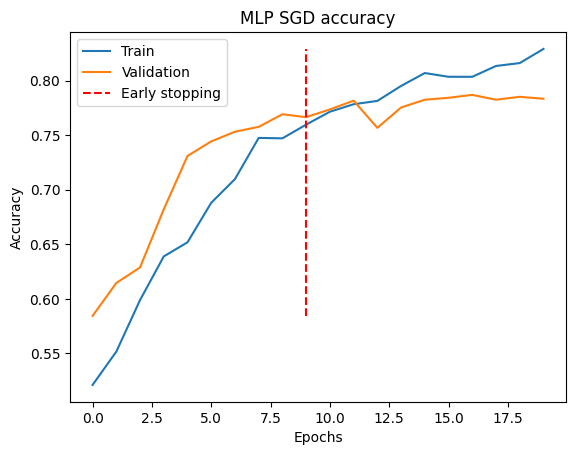

In [41]:
# Curves Accuracy
plt.plot(model_train_s1.history['accuracy'])
plt.plot(model_train_s1.history['val_accuracy'])
plt.vlines(x=9,ymin=min(model_train_s1.history['val_accuracy']), ymax=max(model_train_s1.history['accuracy']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('MLP SGD accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_sgd_acc_79_final.png',  dpi=500)
plt.show()

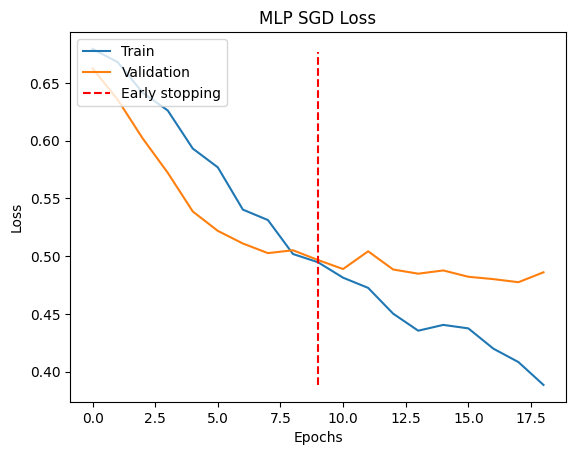

In [42]:
# Curves loss
plt.plot(model_train_s1.history['loss'][1:])
plt.plot(model_train_s1.history['val_loss'][1:])
plt.vlines(x=9, ymin=min(model_train_s1.history['loss']), ymax=max(model_train_s1.history['val_loss']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('MLP SGD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_SGD_79_loss_final.png',  dpi=500)
plt.show()

In [43]:
evaluation = model_sgd1.evaluate(x_test1,y_test1)

print("Accuracy: %.2f" % (evaluation[1] * 100))
print('Loss: %2f' % (evaluation[0]))

predictions = model_sgd1.predict(x_test1)

maxi = [np.argmax(x) for x in predictions]
print("10 first Prediction, Rounded raw predictions and true class")
for i in range(10):
  print(f'{predictions[i]} | {maxi[i]} | True:  {y_test1.iloc[i]} ')

36/36 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7833
Accuracy: 78.33
Loss: 0.486062
36/36 [==============================] - 0s 2ms/step
10 first Prediction, Rounded raw predictions and true class
[0.87217075] | 0 | True:  Activity    1
Name: 2767, dtype: int64 
[0.7969705] | 0 | True:  Activity    0
Name: 2745, dtype: int64 
[0.9595157] | 0 | True:  Activity    1
Name: 660, dtype: int64 
[0.3760549] | 0 | True:  Activity    1
Name: 2165, dtype: int64 
[0.23662233] | 0 | True:  Activity    1
Name: 2340, dtype: int64 
[0.53041553] | 0 | True:  Activity    0
Name: 2914, dtype: int64 
[0.12896068] | 0 | True:  Activity    0
Name: 1818, dtype: int64 
[0.86438113] | 0 | True:  Activity    1
Name: 38, dtype: int64 
[0.50206107] | 0 | True:  Activity    1
Name: 1532, dtype: int64 
[0.9219697] | 0 | True:  Activity    1
Name: 2477, dtype: int64 


36/36 [==============================] - 0s 2ms/step
[[375 134]
 [100 517]]
Accuracy:0.79


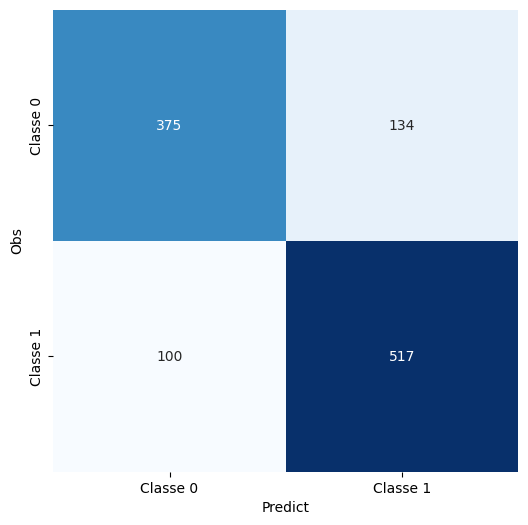

In [ ]:

X_test = pd.read_csv("X_test_30.csv", index_col=0)
y_test = pd.read_csv("y_test_30.csv")
indices_test = y_test["Unnamed: 0"]
y_test = pd.read_csv("y_test_30.csv", index_col=0)
y_pred_test_proba = model_sgd1.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()
predictions = [1 if p>=0.5 else 0 for p in y_pred_test_proba]
# SAVE LES 0/1 PREDITS
y_pred_to_save = pd.DataFrame( predictions, indices_test)
y_pred_to_save.to_csv("YPred_models/y_pred_sgd_79_final.csv")
# SAVE LES PROBAS PREDITS
y_pred_prob_to_save = pd.DataFrame( y_pred_test_proba, indices_test)
y_pred_prob_to_save.to_csv("YPred_models/y_pred_prob_sgd_79_final.csv")

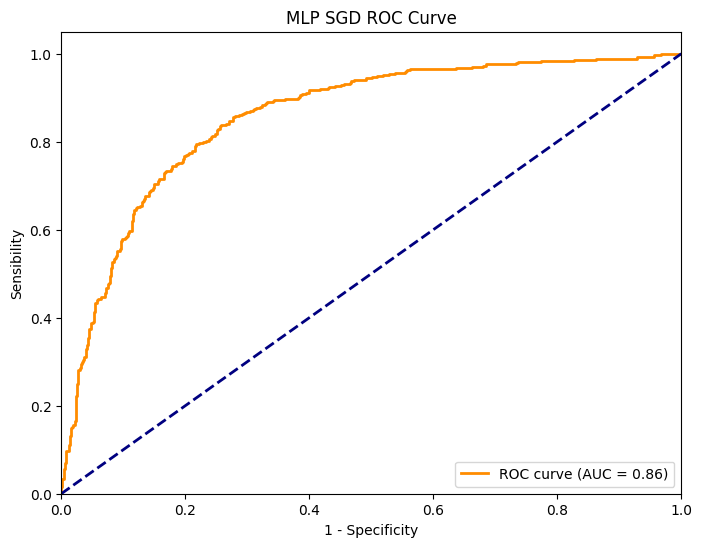

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('MLP SGD ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/sgd_79_ROC_final.png',  dpi=500)
plt.show()

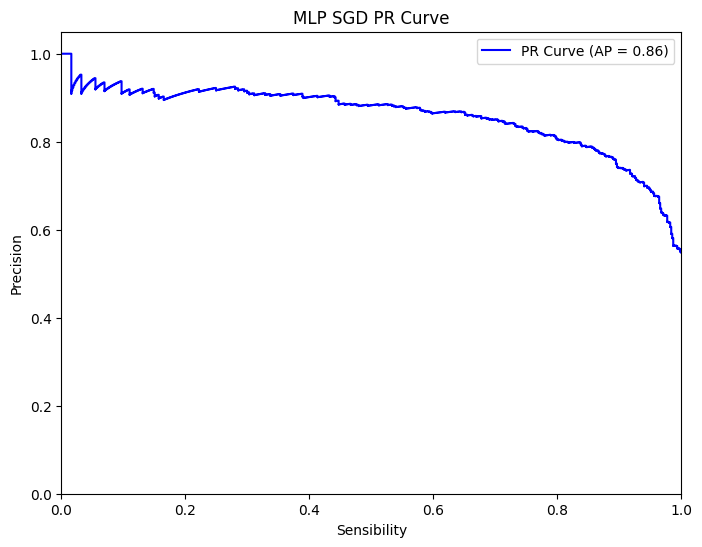

In [ ]:
# PR curve :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_test_proba)

average_precision = average_precision_score(y_test, y_pred_test_proba)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('MLP SGD PR Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_classes)
print("F1-Score:", f1)

F1-Score: 0.8154574132492114


In [ ]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_classes)
print("MCC:", mcc)

MCC: 0.5791329542803982


In [ ]:
# Sensibilité :
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_test_classes)

print("Sensibilité", sensitivity)

Sensibilité 0.8379254457050244


In [ ]:
# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

Specificity: 0.7367387033398821


In [ ]:
# Log loss
import math
def compute_log_loss_for_one_sample(y_obs, y_pred):
  return -(y_obs * math.log(y_pred) + (1-y_obs)*math.log(1-y_pred))

def compute_log_loss(y_obs, y_pred):
  """
  Computing the log loss metric.
  y_obs = the data we have, the "real" data (vector)
  """
  log_loss = -np.mean(y_obs * np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))
  return log_loss

In [ ]:

log_losses = []
# Getting the log loss for each sample in test data set
for i in range(len(y_pred_test_proba)):
  log_losses.append(compute_log_loss_for_one_sample(y_test[i], y_pred_test_proba[i]))

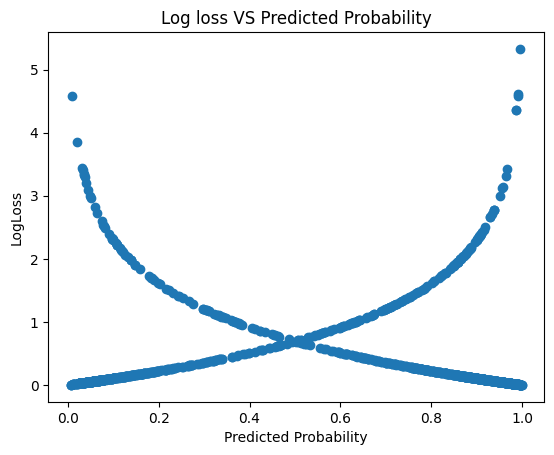

In [ ]:
#Plotting log loss and predicted probability
plt.scatter(y=log_losses, x = y_pred_test_proba)
plt.title('Log loss VS Predicted Probability')
plt.ylabel('LogLoss')
plt.xlabel('Predicted Probability')
plt.show()

In [61]:
# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler
X_test_Kaggle = pd.read_csv("test.csv")
print(X_test_Kaggle.shape)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
print(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[x_train1.columns]
y_pred_test_proba = model_sgd1.predict(X_scaled)
print(y_pred_test_proba.shape)

# Créez un dictionnaire avec les données
y_pred_test_proba = y_pred_test_proba[:, 0]
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_SGD.csv', index=False)

(2501, 1776)
[[0.37931035 0.61176451 0.05       ... 0.         1.         0.        ]
 [0.10344828 0.75817463 0.3        ... 0.         0.         0.        ]
 [0.10344828 0.65881212 0.1        ... 0.         0.         0.        ]
 ...
 [0.         0.53788699 0.15       ... 0.         0.         0.        ]
 [0.03444828 0.53850418 0.1        ... 0.         0.         0.        ]
 [0.17241379 0.64893183 0.05       ... 0.         0.         0.        ]]
79/79 [==============================] - 0s 2ms/step
(2501, 1)


# RNN

In [62]:

# Création du modèle RNN
def RNN_model():
    hidden_units = 256
    input_shape  = (x_train1.shape[1], 1)
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation="relu",return_sequences=True))
    model.add(Flatten())
    model.add(Dense(units=1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.0001))
    return model

In [63]:
tf.random.set_seed(123)
# Affichage de la structure du modèle
model_RNN = RNN_model()

#print(model_RNN.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=4,
                              verbose=0, mode='auto', restore_best_weights=True)  # Stop training after 5 epochs of no improvement in validation loss
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',  # Metric to be monitored
#                               factor=0.5,          # Factor by which the learning rate will be reduced (new_lr = lr * factor)
#                               patience=10,          # Number of epochs with no improvement after which learning rate will be reduced
#                               min_lr=1e-7,         # Lower bound on the learning rate
#                               verbose=1)

model_train_r1 =  model_RNN.fit(x_train1,y_train1, epochs=20,validation_data=(x_test1, y_test1),batch_size=30)#, callbacks=[early_stopping])


Epoch 1/20
88/88 [==============================] - 70s 779ms/step - loss: 0.6287 - accuracy: 0.6575 - val_loss: 0.5569 - val_accuracy: 0.7318
Epoch 2/20
88/88 [==============================] - 67s 761ms/step - loss: 0.5180 - accuracy: 0.7573 - val_loss: 0.5184 - val_accuracy: 0.7540
Epoch 3/20
88/88 [==============================] - 67s 764ms/step - loss: 0.4594 - accuracy: 0.7909 - val_loss: 0.4783 - val_accuracy: 0.7806
Epoch 4/20
88/88 [==============================] - 66s 754ms/step - loss: 0.4229 - accuracy: 0.8034 - val_loss: 0.4824 - val_accuracy: 0.7735
Epoch 5/20
88/88 [==============================] - 66s 747ms/step - loss: 0.4059 - accuracy: 0.8156 - val_loss: 0.4827 - val_accuracy: 0.7833
Epoch 6/20
88/88 [==============================] - 65s 741ms/step - loss: 0.3740 - accuracy: 0.8373 - val_loss: 0.4883 - val_accuracy: 0.7798
Epoch 7/20
88/88 [==============================] - 66s 747ms/step - loss: 0.3628 - accuracy: 0.8446 - val_loss: 0.4863 - val_accuracy: 0.7851

In [ ]:
model = RNN_model()
print(f'{model.summary()}')
#plot_model(model, to_file="model.png",
           #    show_shapes=True, show_layer_names=True)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 1533, 128)         16640     
                                                                 
 flatten_28 (Flatten)        (None, 196224)            0         
                                                                 
 dense_123 (Dense)           (None, 1)                 196225    
                                                                 
Total params: 212865 (831.50 KB)
Trainable params: 212865 (831.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


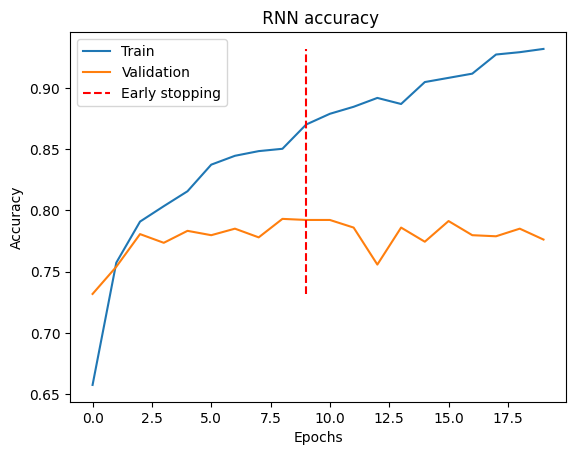

In [65]:
# Curves Accuracy
plt.plot(model_train_r1.history['accuracy'])
plt.plot(model_train_r1.history['val_accuracy'])
plt.vlines(x=9,ymin=min(model_train_r1.history['val_accuracy']), ymax=max(model_train_r1.history['accuracy']), colors='red', linestyles='dashed', label='Early stopping')
plt.title(' RNN accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/RNN_acc_76_final.png',  dpi=500)
plt.show()

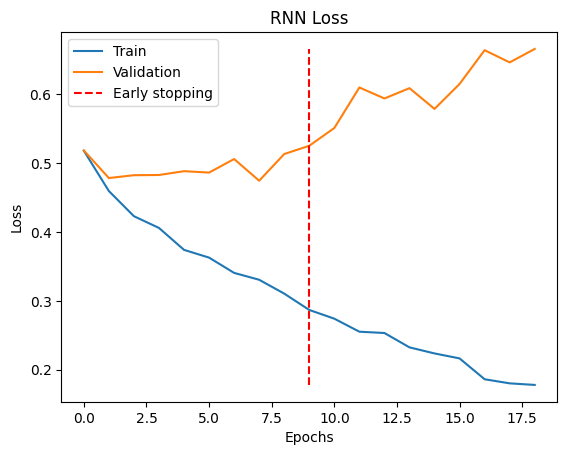

In [66]:
# Curves loss
plt.plot(model_train_r1.history['loss'][1:])
plt.plot(model_train_r1.history['val_loss'][1:])
plt.vlines(x=9, ymin=min(model_train_r1.history['loss']), ymax=max(model_train_r1.history['val_loss']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('RNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_RNN_76_loss_final.png',  dpi=500)
plt.show()

In [67]:
evaluation = model_RNN.evaluate(x_test1,y_test1)

print("Accuracy: %.2f" % (evaluation[1] * 100))
print('Loss: %2f' % (evaluation[0]))

predictions = model_RNN.predict(x_test1)

maxi = [np.argmax(x) for x in predictions]
print("10 first Prediction, Rounded raw predictions and true class")
for i in range(10):
  print(f'{predictions[i]} | {maxi[i]} | True:  {y_test1.iloc[i]} ')

36/36 [==============================] - 4s 105ms/step - loss: 0.6658 - accuracy: 0.7762
Accuracy: 77.62
Loss: 0.665806
36/36 [==============================] - 4s 107ms/step
10 first Prediction, Rounded raw predictions and true class
[0.9049494] | 0 | True:  Activity    1
Name: 2767, dtype: int64 
[0.8689177] | 0 | True:  Activity    0
Name: 2745, dtype: int64 
[0.99973994] | 0 | True:  Activity    1
Name: 660, dtype: int64 
[0.4728766] | 0 | True:  Activity    1
Name: 2165, dtype: int64 
[0.04160399] | 0 | True:  Activity    1
Name: 2340, dtype: int64 
[0.663456] | 0 | True:  Activity    0
Name: 2914, dtype: int64 
[0.06519991] | 0 | True:  Activity    0
Name: 1818, dtype: int64 
[0.7766112] | 0 | True:  Activity    1
Name: 38, dtype: int64 
[0.20548235] | 0 | True:  Activity    1
Name: 1532, dtype: int64 
[0.9932527] | 0 | True:  Activity    1
Name: 2477, dtype: int64 


36/36 [==============================] - 4s 106ms/step
[[378 131]
 [116 501]]
Accuracy:0.78


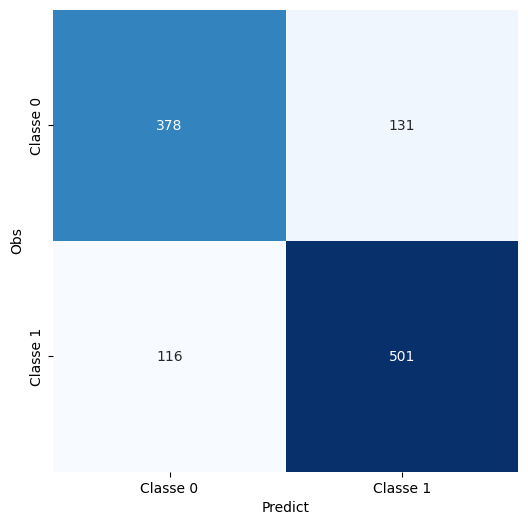

In [68]:

X_test = pd.read_csv("X_test_30.csv", index_col=0)
y_test = pd.read_csv("y_test_30.csv")
indices_test = y_test["Unnamed: 0"]
y_test = pd.read_csv("y_test_30.csv", index_col=0)
y_pred_test_proba = model_RNN.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()
predictions = [1 if p>=0.5 else 0 for p in y_pred_test_proba]
# SAVE LES 0/1 PREDITS
y_pred_to_save = pd.DataFrame( predictions, indices_test)
y_pred_to_save.to_csv("YPred_models/y_pred_RNN_76_final.csv")
# SAVE LES PROBAS PREDITS
y_pred_prob_to_save = pd.DataFrame( y_pred_test_proba, indices_test)
y_pred_prob_to_save.to_csv("YPred_models/y_pred_prob_RNN_76_final.csv")

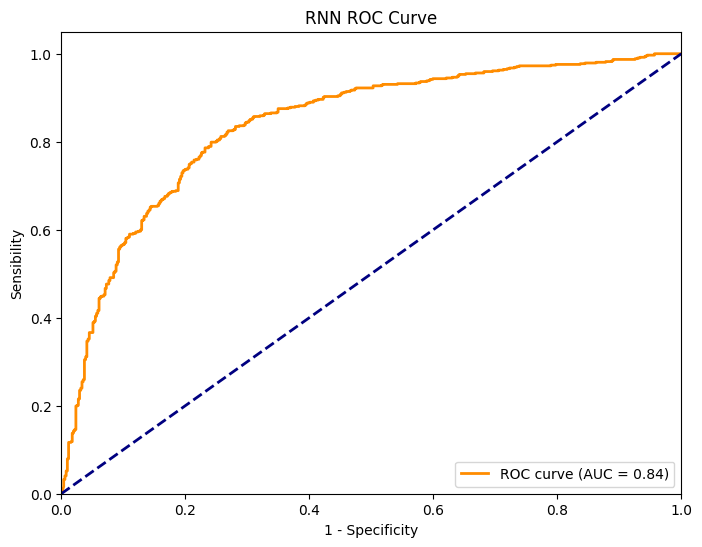

In [69]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('RNN ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/RNN_76_ROC_final.png',  dpi=500)
plt.show()

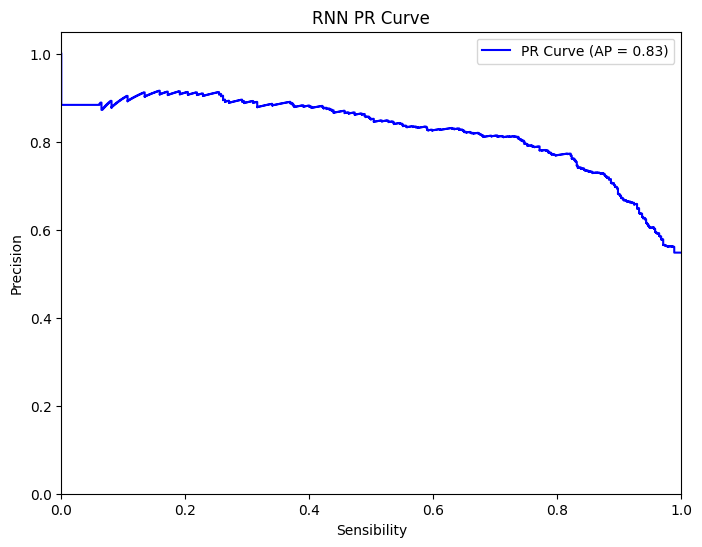

In [ ]:
# PR curve :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_test_proba)

average_precision = average_precision_score(y_test, y_pred_test_proba)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('RNN PR Curve')
plt.legend(loc='upper right')
plt.show()

In [74]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_classes)
print("F1-Score:", f1)

F1-Score: 0.8022417934347477


In [73]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_classes)
print("MCC:", mcc)

MCC: 0.5562625036179772


In [71]:
# Sensibilité :
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_test_classes)

print("Sensibilité", sensitivity)

Sensibilité 0.8119935170178282


In [72]:
# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

Specificity: 0.7426326129666012


In [ ]:
# Log loss
import math
def compute_log_loss_for_one_sample(y_obs, y_pred):
  return -(y_obs * math.log(y_pred) + (1-y_obs)*math.log(1-y_pred))

def compute_log_loss(y_obs, y_pred):
  """
  Computing the log loss metric.
  y_obs = the data we have, the "real" data (vector)
  """
  log_loss = -np.mean(y_obs * np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))
  return log_loss

In [ ]:

log_losses = []
# Getting the log loss for each sample in test data set
for i in range(len(y_pred_test_proba)):
  log_losses.append(compute_log_loss_for_one_sample(y_test[i], y_pred_test_proba[i]))

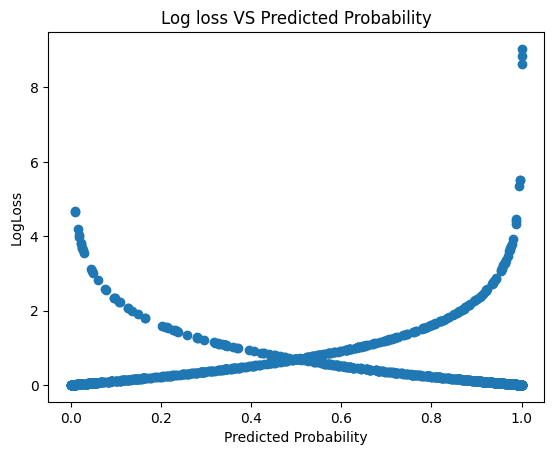

In [ ]:
#Plotting log loss and predicted probability
plt.scatter(y=log_losses, x = y_pred_test_proba)
plt.title('Log loss VS Predicted Probability')
plt.ylabel('LogLoss')
plt.xlabel('Predicted Probability')
plt.show()

In [70]:
# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler
X_test_Kaggle = pd.read_csv("test.csv")
print(X_test_Kaggle.shape)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
print(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[x_train1.columns]
y_pred_test_proba = model_RNN.predict(X_scaled)
print(y_pred_test_proba.shape)

# Créez un dictionnaire avec les données
y_pred_test_proba = y_pred_test_proba[:, 0]
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_RNN.csv', index=False)

(2501, 1776)
[[0.37931035 0.61176451 0.05       ... 0.         1.         0.        ]
 [0.10344828 0.75817463 0.3        ... 0.         0.         0.        ]
 [0.10344828 0.65881212 0.1        ... 0.         0.         0.        ]
 ...
 [0.         0.53788699 0.15       ... 0.         0.         0.        ]
 [0.03444828 0.53850418 0.1        ... 0.         0.         0.        ]
 [0.17241379 0.64893183 0.05       ... 0.         0.         0.        ]]
79/79 [==============================] - 9s 108ms/step
(2501, 1)


 Plot des differentes metrics and evolution of train/validation loss

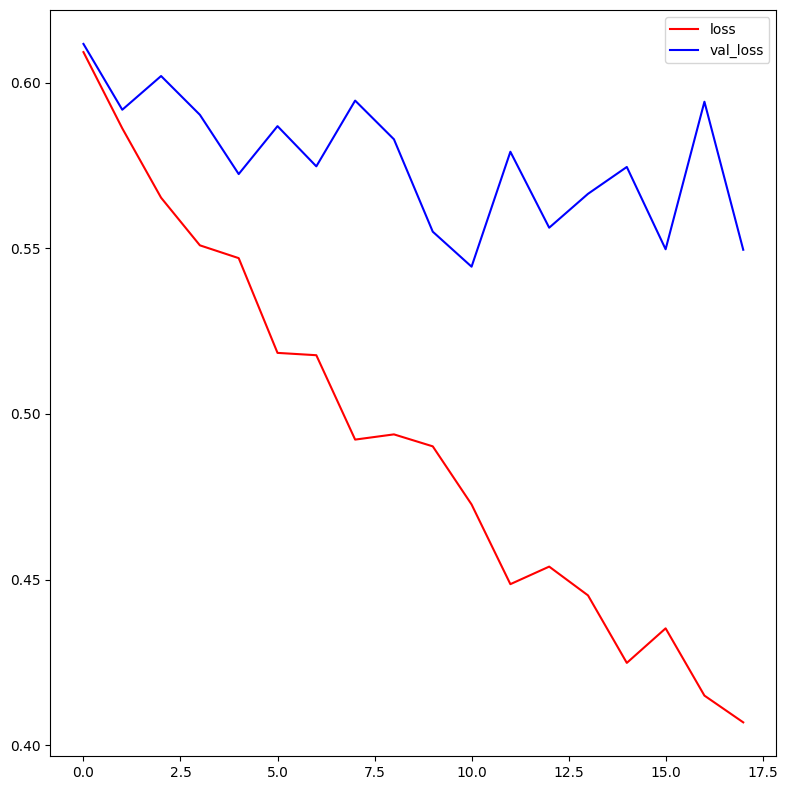

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'][2:], color='red', label='loss');
plt.plot(history.history['val_loss'][2:], color='blue', label='val_loss');
plt.legend();
plt.tight_layout();

In [ ]:
history1R = model_RNN.fit(x_train1,y_train1, validation_data = (x_test1,y_test1), epochs=20, batch_size=25)


In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history1R.history['loss'][2:], color='red', label='loss');
plt.plot(history1R.history['val_loss'][2:], color='blue', label='val_loss');
plt.legend();
plt.tight_layout();


# Gridsearsh RNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping

In [ ]:
def RNN_to_tune(layers=1, filters=50, n_unit_dense=300):
  # Define the input shape
  input_shape = (x_train1.shape[1], 1)

  model = Sequential()
  # Input layer :
  model.add(SimpleRNN(filters, activation='relu', input_shape=input_shape,return_sequences=True
                   #kernel_initializer=initializers.Orthogonal()
                   ))
  # Dropout because too much over fitting
  model.add(Dropout(0.5))

  for i in range(1, layers+1):
    filters += 10
    model.add(SimpleRNN(filters, activation="relu", return_sequences=True))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

  # Flatten the layer:
  model.add(Flatten())
  model.add(Dense(n_unit_dense, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid')) # probability => log loss

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.007), loss='binary_crossentropy', metrics=['accuracy']) #pas sure de la métrique
  return model

In [ ]:
model_tune = KerasClassifier(build_fn=RNN_to_tune, layers=1, filters=10, n_unit_dense=900, epochs=50, batch_size=100, verbose=2)
param_grid = {
    'layers': [1,2, 3],
    'filters': [15,20,25],
    'n_unit_dense': [900,1000,1200,1500]

}

In [ ]:
grid_search = GridSearchCV(estimator=model_tune, param_grid=param_grid, cv=2, error_score='raise')
grid_search_result = grid_search.fit(x_train1, y_train1)  # X_train et y_train sont vos données d'entraînement


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


KeyboardInterrupt: ignored

In [ ]:
# Best paramters found :
best_params = grid_search_result.best_params_
print(best_params)



# Gridsearsh MLP

In [ ]:
from sklearn.model_selection import GridSearchCV

from keras.callbacks import EarlyStopping

In [ ]:
def mlp_to_tune(layers=3, filters=900):
  # Define the input shape
  input_shape = (x_train1.shape[1], 1)
  model = Sequential()
  model.add(Dense(filters, input_shape=input_shape, activation='relu'))
  model.add(Dropout(0.5))

  for i in range(1, layers+1):
    filters -=150
    model.add(Dense(filters, activation="relu"))
    model.add(Dropout(0.4))

  # Flatten the layer:
  model.add(Flatten())
  model.add(Dense(filters, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid')) # probability => log loss

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy']) #pas sure de la métrique
  return model

In [ ]:
model_tune = KerasClassifier(build_fn=mlp_to_tune, layers=3, filters=900, epochs=20, batch_size=30, verbose=2)
param_grid = {
    'layers': [3,4,5],
    'filters': [900,700,500]
}

In [ ]:
grid_search = GridSearchCV(estimator=model_tune, param_grid=param_grid, cv=2, error_score='raise')
grid_search_result = grid_search.fit(x_train1, y_train1)  # X_train et y_train sont vos données d'entraînement


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
44/44 - 17s - loss: 0.7020 - accuracy: 0.5633 - 17s/epoch - 385ms/step
Epoch 2/20
44/44 - 9s - loss: 0.5816 - accuracy: 0.7111 - 9s/epoch - 202ms/step
Epoch 3/20
44/44 - 9s - loss: 0.5612 - accuracy: 0.7142 - 9s/epoch - 201ms/step
Epoch 4/20
44/44 - 9s - loss: 0.5099 - accuracy: 0.7462 - 9s/epoch - 202ms/step
Epoch 5/20
44/44 - 9s - loss: 0.4656 - accuracy: 0.7767 - 9s/epoch - 202ms/step
Epoch 6/20
44/44 - 9s - loss: 0.4521 - accuracy: 0.8041 - 9s/epoch - 205ms/step
Epoch 7/20
44/44 - 9s - loss: 0.4522 - accuracy: 0.7866 - 9s/epoch - 206ms/step
Epoch 8/20
44/44 - 9s - loss: 0.4287 - accuracy: 0.8102 - 9s/epoch - 208ms/step
Epoch 9/20
44/44 - 9s - loss: 0.3982 - accuracy: 0.8216 - 9s/epoch - 210ms/step
Epoch 10/20
44/44 - 9s - loss: 0.3969 - accuracy: 0.8232 - 9s/epoch - 213ms/step
Epoch 11/20
44/44 - 9s - loss: 0.4003 - accuracy: 0.8186 - 9s/epoch - 215ms/step
Epoch 12/20
44/44 - 9s - loss: 0.3711 - accuracy: 0.8392 - 9s/epoch - 215ms/step
Epoch 13/20
44/44 - 9s - loss: 0.37

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 - 11s - loss: 0.6885 - accuracy: 0.6382 - 11s/epoch - 256ms/step
Epoch 2/20
44/44 - 9s - loss: 0.5373 - accuracy: 0.7441 - 9s/epoch - 214ms/step
Epoch 3/20
44/44 - 9s - loss: 0.4943 - accuracy: 0.7708 - 9s/epoch - 213ms/step
Epoch 4/20
44/44 - 9s - loss: 0.4709 - accuracy: 0.7715 - 9s/epoch - 213ms/step
Epoch 5/20
44/44 - 9s - loss: 0.4548 - accuracy: 0.7921 - 9s/epoch - 213ms/step
Epoch 6/20
44/44 - 9s - loss: 0.4404 - accuracy: 0.8081 - 9s/epoch - 212ms/step
Epoch 7/20
44/44 - 9s - loss: 0.4167 - accuracy: 0.8081 - 9s/epoch - 212ms/step
Epoch 8/20
44/44 - 9s - loss: 0.4145 - accuracy: 0.8096 - 9s/epoch - 212ms/step
Epoch 9/20
44/44 - 9s - loss: 0.3816 - accuracy: 0.8317 - 9s/epoch - 212ms/step
Epoch 10/20
44/44 - 9s - loss: 0.3731 - accuracy: 0.8340 - 9s/epoch - 213ms/step
Epoch 11/20
44/44 - 9s - loss: 0.3518 - accuracy: 0.8378 - 9s/epoch - 213ms/step
Epoch 12/20
44/44 - 9s - loss: 0.3557 - accuracy: 0.8439 - 9s/epoch - 212ms/step
Epoch 13/20
44/44 - 9s - loss: 0.3218 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 - 10s - loss: 0.6985 - accuracy: 0.5526 - 10s/epoch - 235ms/step
Epoch 2/20
44/44 - 8s - loss: 0.6337 - accuracy: 0.6761 - 8s/epoch - 187ms/step
Epoch 3/20
44/44 - 8s - loss: 0.5720 - accuracy: 0.7066 - 8s/epoch - 187ms/step
Epoch 4/20
44/44 - 8s - loss: 0.5204 - accuracy: 0.7439 - 8s/epoch - 187ms/step
Epoch 5/20
44/44 - 8s - loss: 0.4856 - accuracy: 0.7729 - 8s/epoch - 187ms/step
Epoch 6/20
44/44 - 8s - loss: 0.4830 - accuracy: 0.7652 - 8s/epoch - 188ms/step
Epoch 7/20
44/44 - 8s - loss: 0.4577 - accuracy: 0.8026 - 8s/epoch - 186ms/step
Epoch 8/20
44/44 - 8s - loss: 0.4461 - accuracy: 0.7881 - 8s/epoch - 186ms/step
Epoch 9/20
44/44 - 8s - loss: 0.4177 - accuracy: 0.8026 - 8s/epoch - 186ms/step
Epoch 10/20
44/44 - 8s - loss: 0.4058 - accuracy: 0.8148 - 8s/epoch - 186ms/step
Epoch 11/20
44/44 - 8s - loss: 0.3875 - accuracy: 0.8316 - 8s/epoch - 186ms/step
Epoch 12/20
44/44 - 8s - loss: 0.3660 - accuracy: 0.8277 - 8s/epoch - 187ms/step
Epoch 13/20
44/44 - 8s - loss: 0.4005 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


44/44 - 10s - loss: 0.6504 - accuracy: 0.6283 - 10s/epoch - 234ms/step
Epoch 2/20
44/44 - 8s - loss: 0.5612 - accuracy: 0.7289 - 8s/epoch - 190ms/step
Epoch 3/20
44/44 - 8s - loss: 0.5243 - accuracy: 0.7433 - 8s/epoch - 190ms/step
Epoch 4/20
44/44 - 8s - loss: 0.4984 - accuracy: 0.7570 - 8s/epoch - 189ms/step
Epoch 5/20
44/44 - 8s - loss: 0.4592 - accuracy: 0.7890 - 8s/epoch - 189ms/step
Epoch 6/20
44/44 - 8s - loss: 0.4561 - accuracy: 0.7959 - 8s/epoch - 189ms/step
Epoch 7/20
44/44 - 8s - loss: 0.4123 - accuracy: 0.8172 - 8s/epoch - 188ms/step
Epoch 8/20
44/44 - 8s - loss: 0.4144 - accuracy: 0.8065 - 8s/epoch - 189ms/step
Epoch 9/20
44/44 - 8s - loss: 0.4059 - accuracy: 0.8256 - 8s/epoch - 189ms/step
Epoch 10/20
44/44 - 8s - loss: 0.3883 - accuracy: 0.8340 - 8s/epoch - 188ms/step
Epoch 11/20
44/44 - 8s - loss: 0.3517 - accuracy: 0.8439 - 8s/epoch - 188ms/step
Epoch 12/20
44/44 - 8s - loss: 0.3482 - accuracy: 0.8484 - 8s/epoch - 188ms/step
Epoch 13/20
44/44 - 8s - loss: 0.3405 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
44/44 - 10s - loss: 0.6677 - accuracy: 0.6098 - 10s/epoch - 223ms/step
Epoch 2/20
44/44 - 7s - loss: 0.6016 - accuracy: 0.6806 - 7s/epoch - 168ms/step
Epoch 3/20
44/44 - 7s - loss: 0.5497 - accuracy: 0.7279 - 7s/epoch - 169ms/step
Epoch 4/20
44/44 - 7s - loss: 0.5330 - accuracy: 0.7470 - 7s/epoch - 168ms/step
Epoch 5/20
44/44 - 7s - loss: 0.4971 - accuracy: 0.7538 - 7s/epoch - 169ms/step
Epoch 6/20
44/44 - 7s - loss: 0.4982 - accuracy: 0.7630 - 7s/epoch - 169ms/step
Epoch 7/20
44/44 - 7s - loss: 0.4736 - accuracy: 0.7790 - 7s/epoch - 168ms/step
Epoch 8/20
44/44 - 7s - loss: 0.4467 - accuracy: 0.7934 - 7s/epoch - 167ms/step
Epoch 9/20
44/44 - 7s - loss: 0.4189 - accuracy: 0.8125 - 7s/epoch - 167ms/step
Epoch 10/20
44/44 - 7s - loss: 0.4073 - accuracy: 0.8041 - 7s/epoch - 167ms/step
Epoch 11/20
44/44 - 7s - loss: 0.4298 - accuracy: 0.8087 - 7s/epoch - 166ms/step
Epoch 12/20
44/44 - 7s - loss: 0.4071 - accuracy: 0.8155 - 7s/epoch - 166ms/step
Epoch 13/20
44/44 - 7s - loss: 0.37

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
44/44 - 10s - loss: 0.6927 - accuracy: 0.5948 - 10s/epoch - 221ms/step
Epoch 2/20
44/44 - 7s - loss: 0.6014 - accuracy: 0.6915 - 7s/epoch - 169ms/step
Epoch 3/20
44/44 - 7s - loss: 0.5611 - accuracy: 0.7174 - 7s/epoch - 169ms/step
Epoch 4/20
44/44 - 7s - loss: 0.5199 - accuracy: 0.7570 - 7s/epoch - 169ms/step
Epoch 5/20
44/44 - 7s - loss: 0.4942 - accuracy: 0.7616 - 7s/epoch - 170ms/step
Epoch 6/20
44/44 - 7s - loss: 0.4702 - accuracy: 0.7768 - 7s/epoch - 170ms/step
Epoch 7/20
44/44 - 7s - loss: 0.4497 - accuracy: 0.7883 - 7s/epoch - 169ms/step
Epoch 8/20
44/44 - 7s - loss: 0.4255 - accuracy: 0.8073 - 7s/epoch - 169ms/step
Epoch 9/20
44/44 - 7s - loss: 0.4190 - accuracy: 0.8081 - 7s/epoch - 169ms/step
Epoch 10/20
44/44 - 7s - loss: 0.3910 - accuracy: 0.8309 - 7s/epoch - 169ms/step
Epoch 11/20
44/44 - 7s - loss: 0.3879 - accuracy: 0.8134 - 7s/epoch - 168ms/step
Epoch 12/20
44/44 - 7s - loss: 0.3910 - accuracy: 0.8218 - 7s/epoch - 168ms/step
Epoch 13/20
44/44 - 7s - loss: 0.37

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


ResourceExhaustedError: ignored

In [ ]:
# Best paramters found :
best_params = grid_search_result.best_params_
print(best_params)


# Kagle

In [ ]:
from tensorflow.keras import *

feature_cols = test.columns.tolist()

cnt_features = []
cat_features = []

for col in feature_cols:
    if train[col].dtype=='float64':
        cnt_features.append(col)
    else:
        cat_features.append(col)


start_mem = (train.memory_usage(deep=True) / 1024 ** 2).sum()

train[cnt_features] = train[cnt_features].astype('float32')
train[cat_features] = train[cat_features].astype('uint8')
test[cnt_features] = test[cnt_features].astype('float32')
test[cat_features] = test[cat_features].astype('uint8')

end_mem = (train.memory_usage(deep=True) / 1024 ** 2).sum()


train = train.to_pandas()
test = test.to_pandas()

## Categorize

In [ ]:
%%time
bins = 128
n = 0
bins_list = []

bins_list.append(-np.inf)
for i in range(1,bins):
    n += 1./bins
    bins_list.append(n)
bins_list.append(np.inf)

labels = [i for i in range(bins)]
for col in cnt_features:
    train[col] = pd.cut(train[col], bins=bins_list, labels=labels)
    test[col] = pd.cut(test[col], bins=bins_list, labels=labels)

train.head()

In [ ]:
def get_model():
    AF = "relu"
    input_1 = Input(shape=(x_train1.shape[-1]), name="continuous")
    x_1 = Embedding(input_dim=bins, output_dim=4)(input_1)
    x_1 = TimeDistributed(Dense(64, activation=AF))(x_1)
    x_1 = TimeDistributed(Dense(64, activation=AF))(x_1)
    x_1 = Flatten()(x_1)
    x_1 = Dense(128, activation=AF)(x_1)
    x_1 = Dense(128, activation=AF)(x_1)

    input_2 = Input(shape=x_train1.shape[-1], name="categories")
    x_2 = Dense(128, activation=AF)(input_2)
    x_2 = Dense(128, activation=AF)(x_2)

    x = Concatenate()([x_1,x_2])
    x = Dense(64, activation=AF)(x)
    x = Dense(128, activation=AF)(x)
    output = Dense(1, activation="sigmoid", name="output")(x)

    model = tf.keras.Model([input_1,input_2], output)
    return model


model = get_model()
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["AUC"])

tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
cb_es = tf.keras.callbacks.EarlyStopping(monitor="val_auc", patience=4, mode="max", restore_best_weights=True, verbose=1)
cb_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_auc", factor=0.5, patience=2, mode="max", min_lr=0.0001, verbose=1)

history = model.fit((x_train1,x2),
                    y,
                    epochs=20,
                    validation_split=0.2,
                    batch_size=512,
                    validation_batch_size=512,
                    callbacks=[cb_es, cb_lr])

In [ ]:
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape)

words = [f"{i} ({np.round(bins_list[i],3)}-{np.round(bins_list[i+1],3)})" for i in labels]

vecs = io.open('vecs.tsv', 'w', encoding='utf-8')
meta = io.open('meta.tsv', 'w', encoding='utf-8')
for i in range(bins):
    vecs.write(words[i] + "\n")
    meta.write('\t'.join([str(x) for x in weights[i]]) + "\n")
vecs.close()
meta.close()

In [ ]:
preds = model.predict((test[cnt_features].values, test[cat_features].values))